In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import re

In [2]:
from datetime import datetime
import pandas as pd
f = open("wiki-Rfa.txt",encoding="utf8")

sources = []
targets = []
votes = []
results = []
years = []
dates = []
texts = []
for line in f:
    if(line[0:3] == "SRC"):
        sources.append(line[4:].strip('\n'))
    if(line[0:3] == "TGT"):
        targets.append(line[4:].strip('\n'))
    if(line[0:3] == "VOT"):
        votes.append(line[4:].strip('\n'))
    if(line[0:3] == "RES"):
        results.append(line[4:].strip('\n'))
    if(line[0:3] == "YEA"):
        years.append(line[4:].strip('\n'))
    if(line[0:3] == "DAT"):
            dat = line[4:]
            if len(dat) == 1:
                dates.append(0)
            else:
                dat = re.split(':|, | |\n',dat)
                month = {"Jan":"01","Janry" : "01","January" : "01","Feb" : "02","February" : "02","March" : "03","Mar" : "03","Apr" : "04","April" : "04","Mya" : "05","May" : "05","June" : "06","Jun" : "06","Julu" : "07","July" : "07","Jul":"07","Aug":"08","August" : "08","Sep" : "09","September" : "09","October" : 10,"Oct" : 10,"Nov": 11,"November" : 11,"December" : 12,"Dec":12 }
                x = dat[2]
                if int(dat[2]) < 10:
                    x = str(0) + str(dat[2])
                dat = str(dat[4]) + str(month[dat[3]]) + str(x) + str(dat[0]) + str(dat[1])
                dat = int(dat)
                dates.append(dat)
    if(line[0:3] == "TXT"):
        texts.append(line[4:].strip('\n'))
        
df = pd.DataFrame()
df['src'] = sources
df['tgt'] = targets
df['vote'] = votes
df['res'] = results
df['year'] = years
df['date'] = dates
df['txt'] = texts

In [3]:
df = df[df.date != 0]
df

,src,tgt,vote,res,year,date,txt
0,Steel1943,BDD,1,1,2013,201304192313,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,201304200104,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,201304192343,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,201304200011,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,201304200056,"'''Support''', with great pleasure. I work wit..."
5,Sven Manguard,BDD,1,1,2013,201304200153,'''Support''' There are plenty of important ro...
6,Ramaksoud2000,BDD,1,1,2013,201304200200,'''Support''' per noms. I don't see a reason n...
7,RockMagnetist,BDD,1,1,2013,201304200218,'''Support''' BDD already wields a broom pret...
8,Carrite,BDD,1,1,2013,201304200222,'''Support''' barring a completely unexpected ...
9,Someguy1221,BDD,1,1,2013,201304200309,'''Support''' because I see no good reason not...


In [4]:
# Split according to time and using 80% of it as training graph

df_train = df[df['date'] < df['date'].quantile(0.8)]
print(len(df_train)/len(df))
print(df_train)

0.7999978825671755
                          src           tgt vote res  year          date  \
32777                  Shappy   AdjustShift    1   1  2009  200904042018   
32778         Jake Wartenberg   AdjustShift    1   1  2009  200904042021   
32779                  GT5162   AdjustShift    1   1  2009  200904042021   
32780                Giants27   AdjustShift    1   1  2009  200904042026   
32781               America69   AdjustShift    1   1  2009  200904042039   
32782                 Carioca   AdjustShift    1   1  2009  200904042213   
32783                   Erik9   AdjustShift    1   1  2009  200904042237   
32784             Pastor Theo   AdjustShift    1   1  2009  200904042248   
32785   Faithlessthewonderboy   AdjustShift    1   1  2009  200904042256   
32786                 Fastily   AdjustShift    1   1  2009  200904050011   
32787             Malinaccier   AdjustShift    1   1  2009  200904050057   
32788              Aaroncrick   AdjustShift    1   1  2009  200904050

In [5]:
nodes_train = list(set(df_train['src']).union(set(df_train['tgt'])))
len(nodes_train)

edges_train = [[df_train.iloc[i]['src'],df_train.iloc[i]['tgt'],df_train.iloc[i]['vote']] for i in range(len(df_train))] 

# Considering neutral vote as -ve edge

fp1 = open("wiki_Rfa_train.gml",'w',encoding="utf8")
fp1.write("graph\n[\n  multigraph 1\n")
for i in nodes_train:
    fp1.write("  node\n  [\n    id "+str(nodes_train.index(i)+1)+"\n  ]\n")
    
for i in edges_train:
    fp1.write("  edge\n  [\n    source "+str(nodes_train.index(i[0])+1))
    fp1.write("\n    target "+str(nodes_train.index(i[1])+1))
    if int(i[2]) in [-1,0]:
        fp1.write("\n    weight 0\n  ]\n")
    else:
        fp1.write("\n    weight 1\n  ]\n")
fp1.write("\n]") 
fp1.close()

In [6]:
nodes_train = list(set(df['src']).union(set(df['tgt'])))
len(nodes_train)

edges_train = [[df.iloc[i]['src'],df.iloc[i]['tgt'],df.iloc[i]['vote']] for i in range(len(df))] 

# Considering neutral vote as -ve edge

fp1 = open("wiki_Rfa_full_final.gml",'w',encoding="utf8")
fp1.write("graph\n[\n  multigraph 1\n")
for i in nodes_train:
    fp1.write("  node\n  [\n    id "+str(nodes_train.index(i)+1)+"\n  ]\n")
    
for i in edges_train:
    fp1.write("  edge\n  [\n    source "+str(nodes_train.index(i[0])+1))
    fp1.write("\n    target "+str(nodes_train.index(i[1])+1))
    if int(i[2]) in [-1,0]:
        fp1.write("\n    weight 0\n  ]\n")
    else:
        fp1.write("\n    weight 1\n  ]\n")
fp1.write("\n]") 
fp1.close()

In [7]:
# Let's get only the training graph and try to generate the whole graph
G = nx.read_gml("wiki_Rfa_train.gml",label='id')

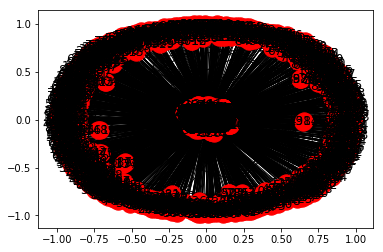

In [8]:
nx.draw_networkx(G)
plt.show()

## The algorithm we developed is as follows

for i = 1 to n do
    Pick a node j uniformly at random from f1; : : : ; i 􀀀 1g
    Create edge (i; j)
    Label the edge + with prob. p, and – with prob. (1 􀀀 p)
    for all neighbors k of j do
        if (i; j) is + then
            Create edge (i; k) with prob. rp.
            if (j; k) is + then
                Label edge (i; k) +.
            else
                Label edge (i; k) + or – with prob. 1/2.
            end if
        else
            if (j; k) is – then
                Create edge (i; k) with prob. rn.
                Label edge (i; k) –.
            end if
        end if
    end for
end for


In [9]:
nodes = nx.nodes(G)
edges = nx.edges(G)
# To select with probability 'p'
# 'p' is the prob of +ve edges
# -------------get from graph directly later ---- hardcoded for now
p = 0.89
edge_weights_for_new = list(np.random.choice([0, 1], size=len(nodes), p=[0.11,0.89]))

#rp is fraction of neighbours of j, that i discovers given that (i,j) is + . 
#rn is the fraction of neighbours of j, that i discovers given that (i,j) is - .
rp = 0.75
rn = 0.23
#len(edge_weights_for_new)
print(len(nx.nodes(G)))
print(len(nx.edges(G)))
print(len(edge_weights_for_new))

9183
151126
9183


In [10]:
import random
for i in range(3,len(nodes)):
    #Pick a node j uniformly at random from {1....i-1}
    j = random.randrange(1,i-1)
    #Create edge (i; j)
    G.add_edge(i,j)
    #Label the edge + with prob. p, and – with prob. (1-p)
    index_for_new_weight = random.randint(0,len(edge_weights_for_new)-1)
    print(index_for_new_weight)
    if(edge_weights_for_new[index_for_new_weight] == 1):
        G[i][j][0]['weight'] = 1
    else:
        G[i][j][0]['weight'] = 0
        
    neighb_j = G.neighbors(j)
    edges_rp = list(np.random.choice([0, 1], size=len(list(neighb_j)), p=[1-rp,rp]))
    edges_rn = list(np.random.choice([0, 1], size=len(list(neighb_j)), p=[1-rn,rn]))
    list_prob_equal = [0,1]
    
    #for all neighbors k of j do
    for k in neighb_j:
        # If (i,j) is +ve
        if(edge_weights_for_new[index_for_new_weight] == 1):
            # Create edge (i; k) with prob. rp.
            create_ik_or_not = random.randint(0,len(list(neighb_j)))
            if(edges_rp[create_ik_or_not] == 1):
                G.add_edge(i,k)
            # If (j,k) is +ve
            if(G[j][k] == 1):
                # label edge (i,k) as +ve
                G[i][k][0]['weight'] = 1
            else:
                # Label edge (i; k) + or – with prob. 1/2.
                index_ik = random.randint(0,len(list_prob_equal))
                if(list_prob_equal[index_ik] == 1):
                    G[i][k][0]['weight'] = 1
                else:
                    G[i][k][0]['weight'] = 0
                
                
        # If (i,j) is -ve
        else:
            # Create edge (i; k) with prob. rn.
            create_ik_or_not = random.randint(0,len(list(neighb_j)))
            if(edges_rp[create_ik_or_not] == 1):
                G.add_edge(i,k)
            # label (i,k) -ve
            G[i][k][0]['weight'] = 0
            

8865
463
2880
982
5579
4655
6669
5966
3900
1314
66
1789
4339
1624
8797
853
7344
4069
4824
4532
6932
673
5425
3369
1432
2643
5299
8820
4223
95
8268
738
9114
2182
7627
2868
8637
1410
7172
2513
6941
679
3912
6036
4490
4700
2994
5142
7622
8331
2057
4077
995
2571
5246
8697
4102
1578
3005
7894
7759
6026
1128
6434
8726
3976
8770
2548
5579
4691
4813
971
2727
8244
5423
5660
3040
9047
7748
2019
1279
8015
3162
2487
410
2906
1952
7515
291
4554
3280
1874
1646
2422
4567
1454
5851
5795
8295
575
1671
4633
8596
5672
1444
3328
7098
2779
1336
1391
3841
7333
570
1904
9118
3835
8056
1479
7288
2946
8729
297
4285
1469
4326
2639
2971
7998
1891
8132
6629
7620
8368
5157
5869
8748
8320
1354
6401
1091
452
3415
6136
4396
1072
8057
8036
6589
8349
1660
9143
8902
3601
8933
2638
3186
545
1549
109
1156
8002
3023
623
5390
4503
2908
3469
713
8202
7262
4407
7857
7219
22
5394
6501
1262
2942
5089
3905
8661
6420
8538
4256
7930
7703
3189
343
7896
3764
3505
2107
7078
1111
6944
5402
64
267
3656
5371
3553
3636
6071
3144
745
1328

8750
7207
8328
1512
5672
3623
8737
6563
7012
7863
2652
1142
3395
834
5317
1181
5482
6076
1590
3737
7986
2222
3371
3247
3996
3904
641
2903
6272
6880
4053
5504
1340
1937
4747
5894
502
2018
8228
7989
289
3018
7470
1875
7626
218
5311
7807
8327
8747
4029
3618
8848
6057
5202
7033
5284
3602
561
5335
763
1877
4345
8972
6676
1487
8654
2982
8857
4151
2771
3145
455
6731
8481
2404
5262
4136
8163
1952
90
7641
5670
7084
3524
3919
8981
5115
1503
5697
6096
4433
885
5707
3087
5066
228
6176
7407
4737
1353
6970
6680
35
6868
7857
1223
8428
8860
4899
8326
677
5328
1306
4555
1137
968
9111
1641
6793
7014
8560
3966
6284
1721
5409
8189
3905
2804
2090
138
880
3183
1122
9108
288
8846
2422
1832
2451
1835
6827
4131
5359
1500
6802
6675
3891
3474
858
7067
7344
8998
8649
721
8147
2307
8943
7292
3784
8170
4460
8017
5456
7765
7330
3591
4557
4581
4285
3690
2429
806
6265
4333
3238
8352
6138
4094
6684
823
4165
7522
4335
11
6049
6872
1660
1845
7092
2163
3950
2987
2993
2889
7019
2539
5192
1119
4424
4859
8440
7867
5389
4059


6190
2067
2162
726
8574
3456
1250
5869
808
7926
426
4237
7605
4886
5403
9118
7112
4112
4802
4170
2677
5268
6103
8078
1927
1498
1219
547
3196
7195
4209
1131
169
1859
6635
7256
6660
4356
8880
4629
5102
835
6177
4297
8811
5889
3633
5458
7928
8725
3492
8115
1298
6827
2878
5783
7478
16
3645
9069
1670
8374
5774
6141
3423
7464
8736
1434
7538
2461
6160
7656
8807
4039
5814
5222
1044
8544
2537
2817
1363
7782
1640
4684
4094
4148
2711
6056
3290
5235
7936
4723
5317
4694
3714
5236
5567
2464
6957
5062
3774
2857
6736
5706
1904
3281
4482
6260
1182
3441
8620
3329
4652
1126
4873
5485
907
3979
7331
1382
6248
4083
3306
1619
3560
8891
1502
7964
5595
3524
8986
6646
8546
7480
5926
8218
605
704
3045
3675
423
7712
4105
3565
3098
2048
8089
7475
5444
6126
1880
5843
2059
272
8891
1134
6083
2412
5372
8746
3467
214
7060
5392
4610
1688
6416
6079
579
3592
2971
3605
59
1122
7847
3506
6960
9015
1799
6504
3396
4359
8184
1653
5090
5202
941
8107
8456
8730
5710
2564
367
3125
6369
1300
6089
7665
8974
7043
6001
6982
1750
9166

6792
388
5519
3561
4823
6841
6861
6699
6314
1165
5704
3652
2125
5702
7048
531
7658
6885
4377
7675
1702
3305
6084
6346
6094
9002
8464
1622
6766
8961
4052
6320
2675
5287
8491
2479
5910
8115
7350
988
7761
470
7697
330
7485
843
8932
6506
4218
3952
3016
8950
8077
761
38
7166
630
61
6436
5282
6407
5959
366
40
6937
8146
7550
6664
2911
4433
3952
7572
3818
2651
1690
7053
7038
5223
985
1773
4511
5027
3033
451
7119
7188
5991
2770
2753
2353
2922
610
2666
5815
7039
8701
8358
5161
5375
494
1599
1245
3081
2645
4382
5451
1730
8446
7974
8868
8968
6456
592
6747
5942
5742
6767
6160
47
8262
3013
4038
8119
659
9045
7715
4121
4303
3660
4354
6396
544
999
1973
3470
3988
41
8689
3611
8276
2400
6059
8999
5354
384
339
7672
6180
2391
2314
4250
4298
4016
7221
1737
3818
2669
8333
566
6140
541
7208
4002
1745
4212
5666
3801
205
2435
1783
7870
641
7950
3813
8196
8427
4598
95
6180
115
532
6236
7896
5403
521
8627
6088
8990
4996
1688
6065
7133
1307
5363
4820
6183
1042
2247
1271
5536
6432
4196
2052
749
5630
405
8177
7942


9065
836
4094
3225
5215
3361
1054
2440
3522
6430
3228
7770
4884
3965
6187
2159
9025
5520
7219
6690
6622
8364
209
6179
3372
6675
4410
8805
7097
3767
6304
7563
6136
5789
8551
6928
6171
7474
2795
7127
2285
7284
2702
5494
5713
430
5564
1195
4931
3223
5330
1782
822
4265
4507
3632
4661
6682
8337
5457
5356
5634
480
1436
3260
1754
7891
3675
1173
8859
8538
3363
8129
6770
6315
6316
8374
3647
7340
2548
3894
766
1231
2087
6701
5151
5792
3230
7938
8326
5578
7297
1873
5534
3476
160
4427
3515
2409
1063
5561
7101
8054
6132
1403
6223
2764
3629
8196
4192
8166
6268
3404
1830
7826
168
3954
3128
8157
1291
1268
5852
8044
3305
1378
3308
991
7377
5909
6934
1107
6981
6931
301
1708
4789
7022
8453
2240
4174
8493
1839
2962
5831
8661
8102
1281
712
1050
1722
3601
6752
2656
1751
6647
1674
8341
9131
7350
7568
2625
792
8869
8721
2822
8992
8011
2201
5233
1882
8756
2416
8383
1773
1759
3424
4366
4593
2420
3701
7942
1480
307
7459
1287
8137
2801
7059
3016
1621
5944
8001
3751
2099
993
2281
8974
3038
8614
5139
8044
7975
2231

In [11]:
len(nx.edges(G))

160306

In [12]:
# To compare how the algo performed, we will compare the triadic statistics as follows
G1=nx.to_directed(G)
triads_t = nx.triadic_census(G1)

#no of triads
print("The sum of each type of triads:")
triads_t

The sum of each type of triads:


{'003': 127680353925,
 '012': 0,
 '102': 1320016359,
 '021D': 0,
 '021U': 0,
 '021C': 0,
 '111D': 0,
 '111U': 0,
 '030T': 0,
 '030C': 0,
 '201': 19665524,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 1025423}

In [13]:
ratios_of_triads_t = []
sum_triads_t = sum(triads_t.values()) 

for i in triads_t.keys():
    ratios_of_triads_t.append((i,(triads_t[i]/sum_triads_t)))
    
print("The ratios of each type of traids:")
ratios_of_triads_t

The ratios of each type of traids:


[('003', 0.9896086166614334),
 ('012', 0.0),
 ('102', 0.01023101458324417),
 ('021D', 0.0),
 ('021U', 0.0),
 ('021C', 0.0),
 ('111D', 0.0),
 ('111U', 0.0),
 ('030T', 0.0),
 ('030C', 0.0),
 ('201', 0.00015242103740559644),
 ('120D', 0.0),
 ('120U', 0.0),
 ('120C', 0.0),
 ('210', 0.0),
 ('300', 7.947717916876201e-06)]

In [14]:
# Lets get the same statistics for the original graph to see how the algo performed
# Let's get only the training graph and try to generate the whole graph
G_orig = nx.read_gml("wiki_Rfa_full_final.gml",label='id')

G1=nx.to_directed(G_orig)
triads_f = nx.triadic_census(G1)

#no of triads
print("The sum of each type of triads:")
triads_f

The sum of each type of triads:


{'003': 227756102603,
 '012': 0,
 '102': 1885184670,
 '021D': 0,
 '021U': 0,
 '021C': 0,
 '111D': 0,
 '111U': 0,
 '030T': 0,
 '030C': 0,
 '201': 25165620,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 1340111}

In [15]:
ratios_of_triads_f = []
sum_triads_f = sum(triads_f.values()) 

for i in triads_f.keys():
    ratios_of_triads_f.append((i,(triads_f[i]/sum_triads_f)))
    
print("The ratios of each type of traids:")
ratios_of_triads_f

The ratios of each type of traids:


[('003', 0.9916762800042812),
 ('012', 0.0),
 ('102', 0.008208310992770182),
 ('021D', 0.0),
 ('021U', 0.0),
 ('021C', 0.0),
 ('111D', 0.0),
 ('111U', 0.0),
 ('030T', 0.0),
 ('030C', 0.0),
 ('201', 0.000109574005439943),
 ('120D', 0.0),
 ('120U', 0.0),
 ('120C', 0.0),
 ('210', 0.0),
 ('300', 5.834997508669663e-06)]

In [16]:
# To quantify the performance of the algo, let's define "Accuracy" wrt to the ratios of triads as :
y_actual = []
y_predicted = []

for i in range(len(ratios_of_triads_f)):
    y_actual.append(ratios_of_triads_f[i][1])
    y_predicted.append(ratios_of_triads_t[i][1])

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('RMSE = ',rms)

r2 = r2_score(y_actual, y_predicted)
print('r2 = ',r2)

RMSE =  0.0007232047534243286
r2 =  0.9999909136811284


In [21]:
#all plots for generated graph
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)

degc = nx.degree_centrality(G1)
bet = nx.betweenness_centrality(G1)
clos = nx.closeness_centrality(G1)
eig = nx.eigenvector_centrality(G1)

centrality_measures = {
'degree': degc,
'betweenness': bet,
'closeness': clos,
'eigenvector': eig,
}
centrality = pd.DataFrame(centrality_measures)
centrality
sns.pairplot(centrality)
plt.show()

NetworkXNotImplemented: not implemented for multigraph type

In [ ]:
#all plots for original graph
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)

degc = nx.degree_centrality(G_orig)
bet = nx.betweenness_centrality(G_orig)
clos = nx.closeness_centrality(G_orig)
eig = nx.eigenvector_centrality(G_orig)

centrality_measures = {
'degree': degc,
'betweenness': bet,
'closeness': clos,
'eigenvector': eig,
}
centrality = pd.DataFrame(centrality_measures)
centrality
sns.pairplot(centrality)
plt.show()

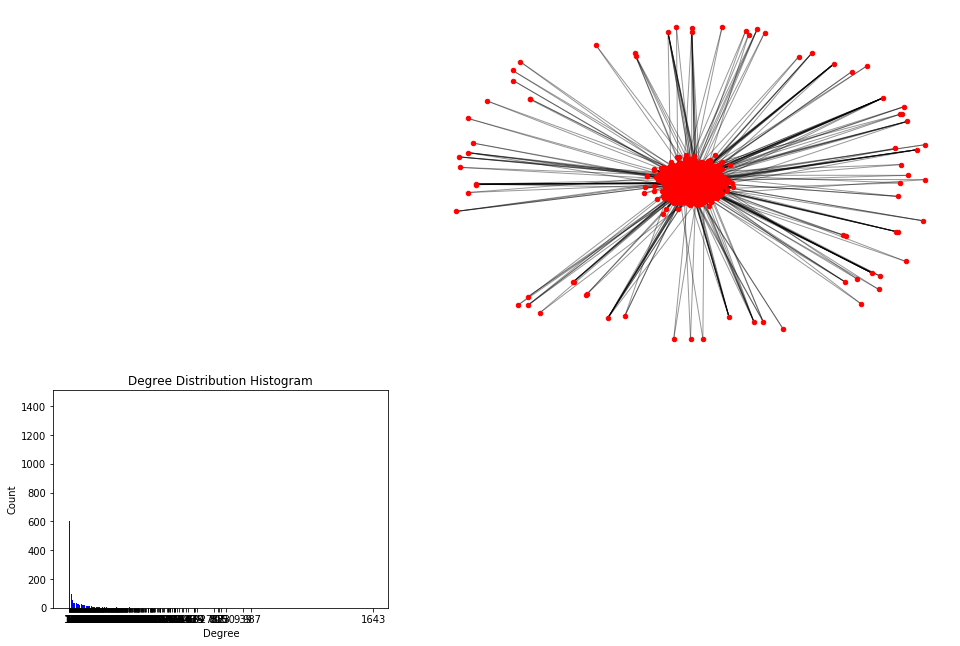

In [17]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Distribution Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([1, 1, 1.2, 1.2])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

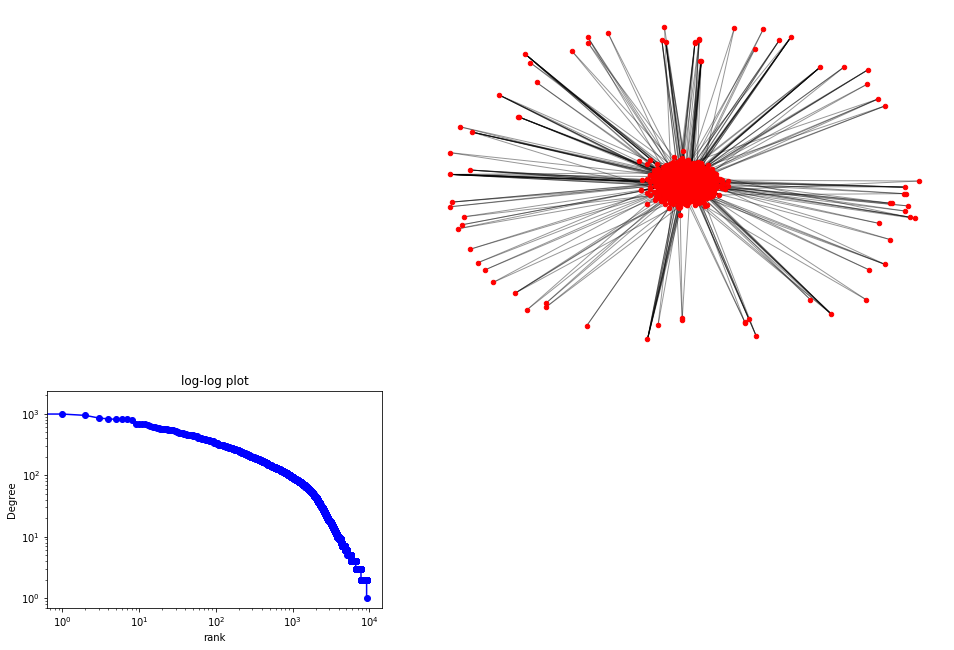

In [18]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
# degreeCount = collections.Counter(degree_sequence)
# deg, cnt = zip(*degreeCount.items())

# fig, ax = plt.subplots()
# plt.bar(deg, cnt, width=0.80, color='b')
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("log-log plot")
plt.ylabel("Degree")
plt.xlabel("rank")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([1, 1, 1.2, 1.2])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

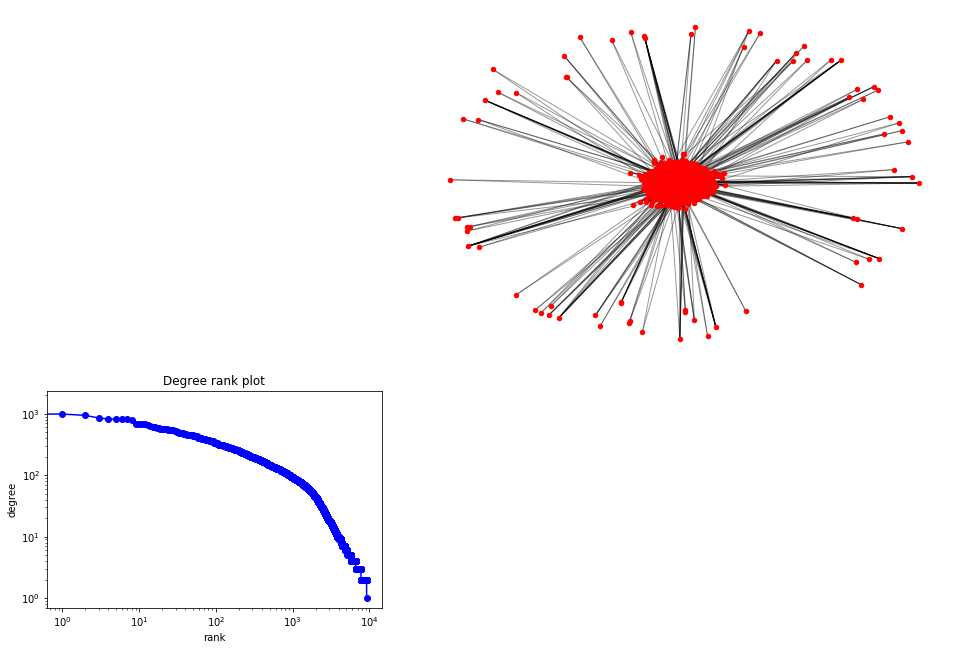

In [20]:

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([1,1,1.2,1.2])
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.savefig("degree_histogram.png")
plt.show()

In [ ]:
actual_f = []
actual_f_labels = []
predicted_f = []
predicted_f_labels = []
for i in ratios_of_triads_f:
    if i[1] != 0.0:
        actual_f.append(i[1])
        actual_f_labels.append(i[0])
for i in ratios_of_triads_t:
    if i[1] != 0.0:
        predicted_f.append(i[1])
        predicted_f_labels.append(i[0])
print(actual_f , actual_f_labels)
print(predicted_f , predicted_f_labels)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 4

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, predicted_f, bar_width,
                alpha=opacity, color='b',
                label='generated')

rects2 = ax.bar(index + bar_width, actual_f, bar_width,
                alpha=opacity, color='r',
                label='actual')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by ratio of triads and type')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(actual_f_labels)
ax.legend()

fig.tight_layout()
plt.show()

In [ ]:
#log scores are plotted for each type of triads
import math
actual_scores_f = []
actual_scores_f_labels = []
predicted_scores_f = []
predicted_scores_f_labels = []
for k,v in triads_f.items():
    if triads_f[k] != 0:
        actual_scores_f.append(math.log(v))
        actual_scores_f_labels.append(k)
for k,v in triads_t.items():
    if triads_t[k] != 0:
        predicted_scores_f.append(math.log(v))
        predicted_scores_f_labels.append(k)
print(actual_scores_f , actual_scores_f_labels)
print(predicted_scores_f , predicted_scores_f_labels)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 4

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, predicted_scores_f, bar_width,
                alpha=opacity, color='b',
                label='generated')

rects2 = ax.bar(index + bar_width, actual_scores_f, bar_width,
                alpha=opacity, color='r',
                label='actual')

ax.set_xlabel('type of triad')
ax.set_ylabel('log(no of triads)')
ax.set_title('Scores by triad type and no of triads')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(actual_scores_f_labels)
ax.legend()

fig.tight_layout()
plt.show()